<a href="https://colab.research.google.com/github/Olanle/Project-001-Image-Classification/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello World!

In [1]:
%pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images / 127.5 - 1
test_images = test_images / 127.5 - 1

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
print('Number of images in the training dataset:' , train_images.shape[0])
print('Number of images in the test dataset:' , test_images.shape[0])

Number of images in the training dataset: 50000
Number of images in the test dataset: 10000


In [5]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (32, 32, 3)


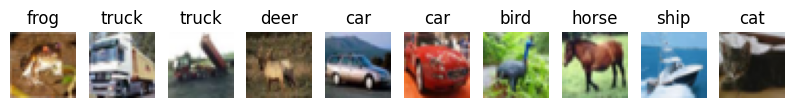

In [6]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    image = train_images[i]
    denomalized_image = (image + 1) / 2
    axes[i].imshow(denomalized_image)
    axes[i].set_title(classes[train_labels[i][0]])
    axes[i].axis('off')

In [7]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,836 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 677,286 (2.58 MB)

 Trainable params: 677,286 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4277 - loss: 1.5690 - val_accuracy: 0.6280 - val_loss: 1.0604
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6676 - loss: 0.9390 - val_accuracy: 0.6945 - val_loss: 0.8838
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7404 - loss: 0.7465 - val_accuracy: 0.7033 - val_loss: 0.8574
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7824 - loss: 0.6193 - val_accuracy: 0.7090 - val_loss: 0.8709
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8192 - loss: 0.5148 - val_accuracy: 0.7111 - val_loss: 0.8863
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8538 - loss: 0.4228 - val_accuracy: 0.7105 - val_loss: 0.9704
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8821 - loss: 0.3407 - val_accuracy: 0.7120 - val_loss: 0.9641
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9030 - loss: 0.2775 

In [10]:
def view_classification(image, probabilities):
  fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
  denormilzed_image = (image + 1) / 2
  ax1.imshow(denormilzed_image)
  ax1.axis('off')
  ax2.barh(np.arange(10), probabilities)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(classes)
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)
  plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


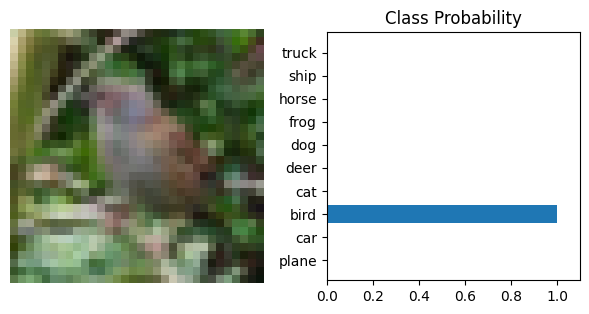

In [15]:
index = 65  # or any other index
image, label = test_images[index], test_labels[index]

input_image = image.reshape(1, 32, 32, 3)  # reshape for model
probabilities = model.predict(input_image)

view_classification(image, probabilities[0])  # use the current image

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy on {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7078 - loss: 1.2643
Accuracy on 10000 test images: 70.96%


## **Now let try to make any prediction we want**

With this setup, every time you upload an image, it will:

Convert it to RGB

Resize it to 32x32

Normalize it

Make a prediction

Show the image and predicted class

Saving hourse.png to hourse.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


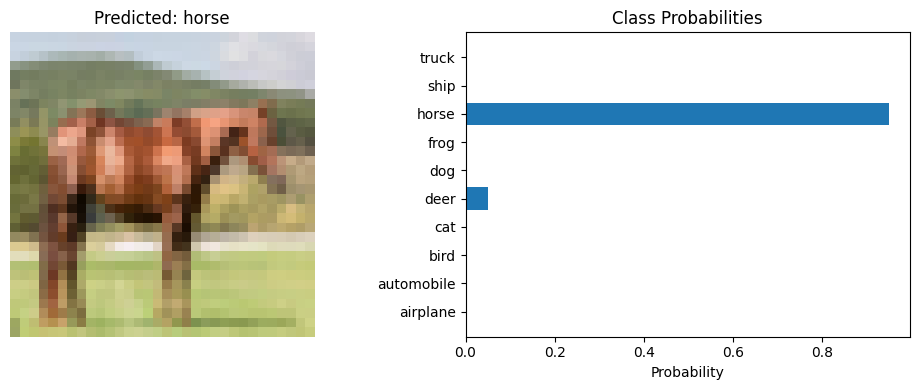


Predicted classes with significant probabilities:
deer: 0.0507
horse: 0.9491

Top prediction: horse with probability 0.9491


In [18]:
from google.colab import files
from PIL import Image

# Step 1: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Load and preprocess image
img = Image.open(filename).convert('RGB').resize((32, 32))  # Force RGB and resize
img_array = np.array(img) / 255.0
input_image = img_array.reshape(1, 32, 32, 3)

# Step 3: Predict
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])

# Step 4: Class names (modify for your dataset if needed)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Step 5: Display image with predicted class
plt.figure(figsize=(10, 4))

# Show image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_class]}")

# Show probabilities as bar chart
plt.subplot(1, 2, 2)
plt.barh(class_names, predictions[0])
plt.xlabel("Probability")
plt.title("Class Probabilities")
plt.tight_layout()
plt.show()

# Print only significant probabilities (above a threshold)
threshold = 0.01  # Adjust threshold as needed
print("\nPredicted classes with significant probabilities:")
for i, prob in enumerate(predictions[0]):
    if prob >= threshold:
        print(f"{class_names[i]}: {prob:.4f}")

# Highlight top class prediction
top_class = class_names[predicted_class]
top_probability = predictions[0][predicted_class]
print(f"\nTop prediction: {top_class} with probability {top_probability:.4f}")